# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from random import randint,random

# Importar dados

## Dados puros

In [2]:
dados = pd.read_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados.csv')
dados

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,21.806600,1378,0.405,18.572359,1.536,0.864,39.621032,22.976,0.733,40.176,deitado,0
1,22.223778,1383,0.397,17.863750,1.521,0.864,38.877279,23.239,0.675,42.073,deitado,0
2,21.242267,1362,0.392,18.453775,1.585,0.836,39.355499,25.215,0.766,35.382,deitado,0
3,21.540400,1412,0.397,18.430484,1.515,0.855,39.692856,23.809,0.738,38.676,deitado,0
4,21.354167,1351,0.391,18.310244,1.569,0.838,39.242927,23.670,0.763,38.237,deitado,0
5,19.791067,1459,0.364,18.392137,1.448,0.808,40.826501,26.312,0.739,42.279,ao lado,1
6,19.648556,1432,0.369,18.780006,1.529,0.785,39.952046,23.331,0.705,44.631,ao lado,1
7,20.826500,1362,0.391,18.774158,1.581,0.830,39.853072,25.685,0.717,52.751,ao lado,1
8,20.645100,1373,0.399,19.326620,1.613,0.834,40.396995,25.227,0.734,43.128,ao lado,1
9,20.226133,1358,0.385,19.034780,1.599,0.811,40.096641,26.405,0.729,56.438,ao lado,1


## Normalizar

In [3]:
from sklearn import preprocessing
cols = list(dados.columns)
x = dados.iloc[:,:-2].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dados_norm = pd.DataFrame(x_scaled)
dados = pd.concat([dados_norm,dados['Plano'],dados['Plano ID']],axis=1,ignore_index=True)
dados.columns = cols
dados.head()

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0


# SMOTE

## (Criar pontos sinteticamente para assegurar balanceamento dos dados - todas as classes com o mesmo # pontos)

In [4]:
def SMOTE(df,plano,plano_id,samples):
    pares = []
    dados = df[df['Plano ID'] == plano_id]
    novos_pontos = []
    for i in range(samples):
        idx1 = randint(0,len(dados)-1)
        ponto1 = dados.iloc[idx1,:]
        idx2 = idx1
        while idx2 == idx1 or (idx1,idx2) in pares or (idx2,idx1) in pares:
            idx2 = randint(0,len(dados)-1)
            ponto2 = dados.iloc[idx2,:]
        pares.append((idx1,idx2))
        ponto2 = dados.iloc[idx2,:]
        valores_novo_ponto = [] 
        for col in df.columns[:-2]:
            taxa = random()
            valor = (ponto2[col]-ponto1[col])*taxa+ponto1[col]
            valores_novo_ponto.append(valor)
        valores_novo_ponto.append(plano)
        valores_novo_ponto.append(plano_id)    
        novo_ponto = pd.DataFrame([valores_novo_ponto],columns=df.columns)
        novos_pontos.append(novo_ponto)
    return pd.concat(novos_pontos)

## Criar 5 pontos para que a classe 45 tenha também 10 pontos

In [5]:
novos_pontos = SMOTE(dados,'45',3,5)
dados = pd.concat([dados,novos_pontos],axis=0,ignore_index=True,sort=False)
dados

,Área S0,Modulus (Automatic Young's),Load at Fy ( 0.2 %) - LE,Tensao em Fy ( 0.2 %) - LE,Deformacao em Fy ( 0.2 %) - LE,Forca Max,Tensao na Forca Max - LR,Deformacao na Forca Max - LR,Forca na Forca na Quebra - LQ,Deformacao na Forca na Quebra - LQ,Plano,Plano ID
0,0.816843,0.187500,0.390476,0.147531,0.356275,0.778571,0.173452,0.505632,0.391892,0.578268,deitado,0
1,0.912370,0.207031,0.314286,0.000000,0.295547,0.778571,0.010531,0.530113,0.000000,0.627464,deitado,0
2,0.687619,0.125000,0.266667,0.122842,0.554656,0.578571,0.115287,0.714046,0.614865,0.453942,deitado,0
3,0.755887,0.320312,0.314286,0.117993,0.271255,0.714286,0.189186,0.583170,0.425676,0.539367,deitado,0
4,0.713242,0.082031,0.257143,0.092959,0.489879,0.592857,0.090627,0.570232,0.594595,0.527982,deitado,0
5,0.355316,0.503906,0.000000,0.110009,0.000000,0.378571,0.437514,0.816159,0.432432,0.632806,ao lado,1
6,0.322683,0.398438,0.047619,0.190763,0.327935,0.214286,0.245962,0.538676,0.202703,0.693802,ao lado,1
7,0.592414,0.125000,0.257143,0.189546,0.538462,0.535714,0.224281,0.757796,0.283784,0.904383,ao lado,1
8,0.550877,0.167969,0.333333,0.304567,0.668016,0.564286,0.343429,0.715163,0.398649,0.654824,ao lado,1
9,0.454940,0.109375,0.200000,0.243807,0.611336,0.400000,0.277636,0.824816,0.364865,1.000000,ao lado,1


# Visualização

## Correlação

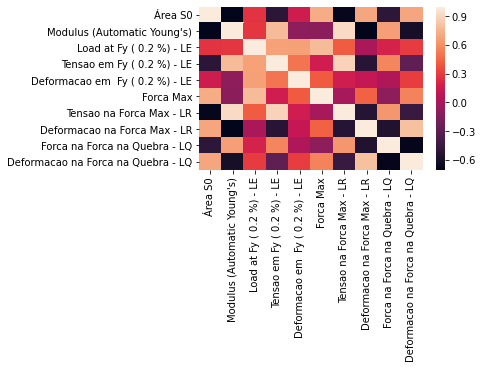

In [6]:
heatmap = sns.heatmap(dados.drop(['Plano','Plano ID'],axis=1).corr())
fig = heatmap.get_figure()
fig.set_size_inches(5, 3)
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Heatmap.png')

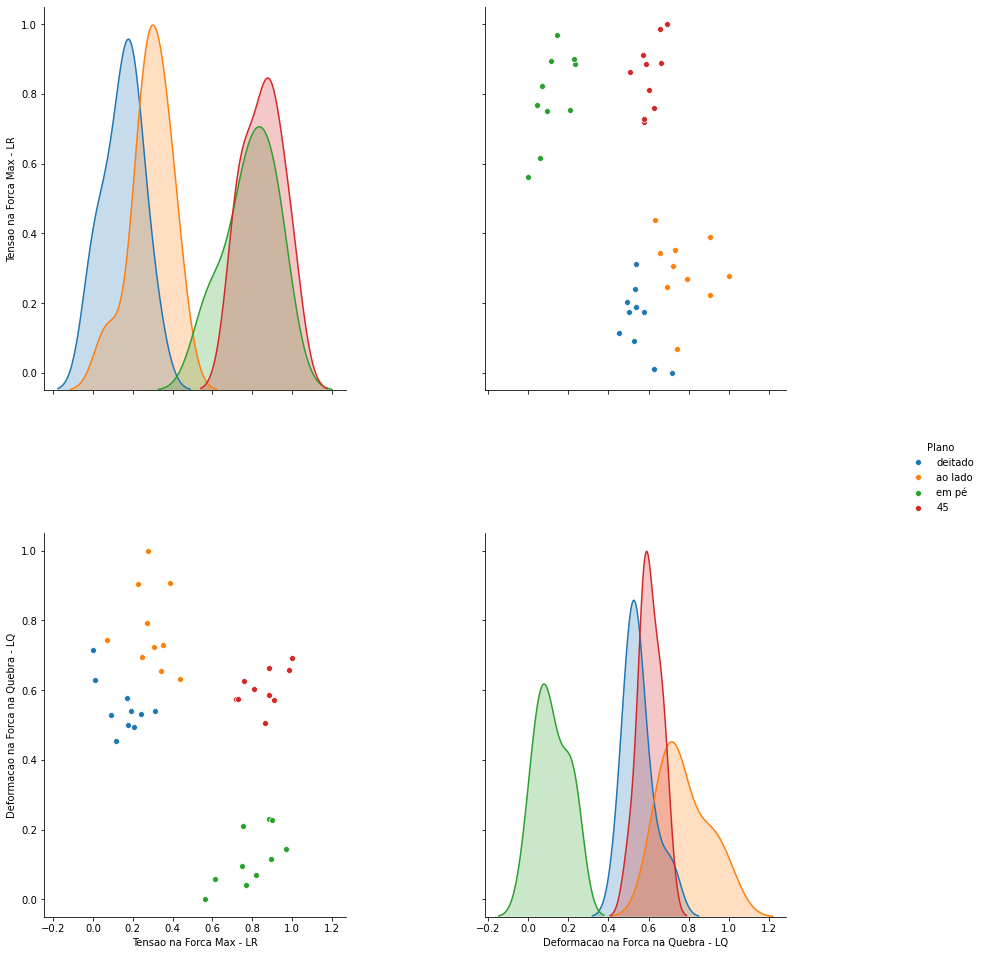

In [7]:
sns.pairplot(dados[['Plano','Tensao na Forca Max - LR','Deformacao na Forca na Quebra - LQ']],hue='Plano').fig.set_size_inches(15,15)

## Pairplot

In [ ]:
pairplot = sns.pairplot(dados.drop(['Plano ID'],axis=1),hue='Plano')
fig = pairplot.fig
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Pairplot.png')

## Boxplot

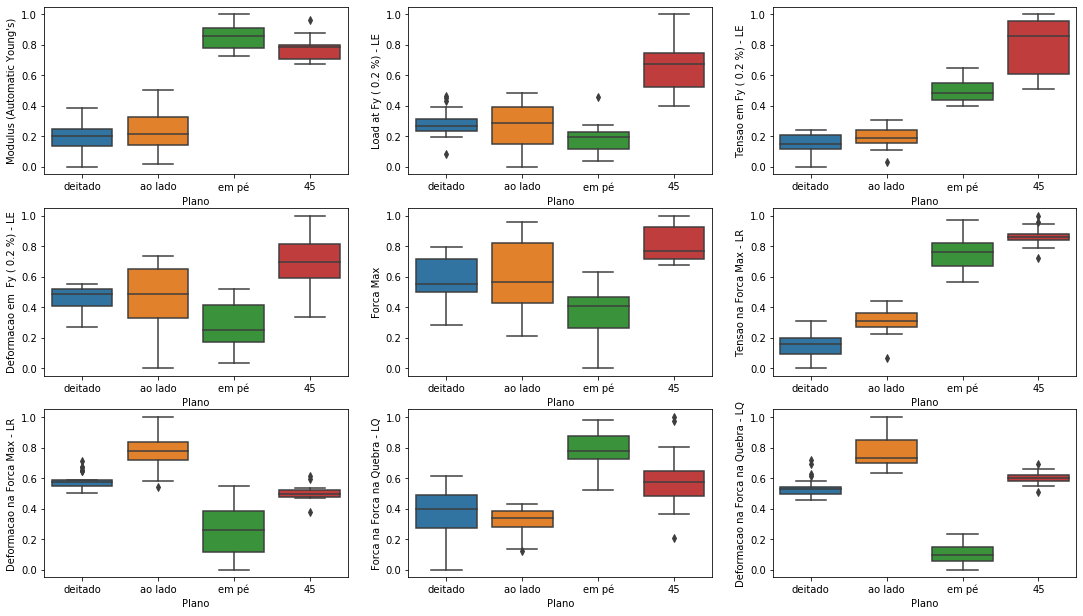

In [339]:
fig,axs=plt.subplots(3,3)
fig.set_size_inches(18.5, 10.5)
cols= dados.columns[1:10]
for i in range(3):
    for j in range(3):
        sns.boxplot(x='Plano',y=cols[i*3+j],data=dados,ax=axs[i][j])
fig.savefig('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Visualização de dados/Boxplot.png')

# Exportar dados normalizados e Balanceados 

In [340]:
dados.to_csv('C:/Users/lucas/Documents/GitHub/INT/Manufatura Aditiva/Classificação Direção/Dados/Dados tratados.csv',index=False)